<a href="https://colab.research.google.com/github/Farhan-BA/Python-/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/HousingData.csv")

In [6]:
df.dropna(inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB
None


In [8]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.0985

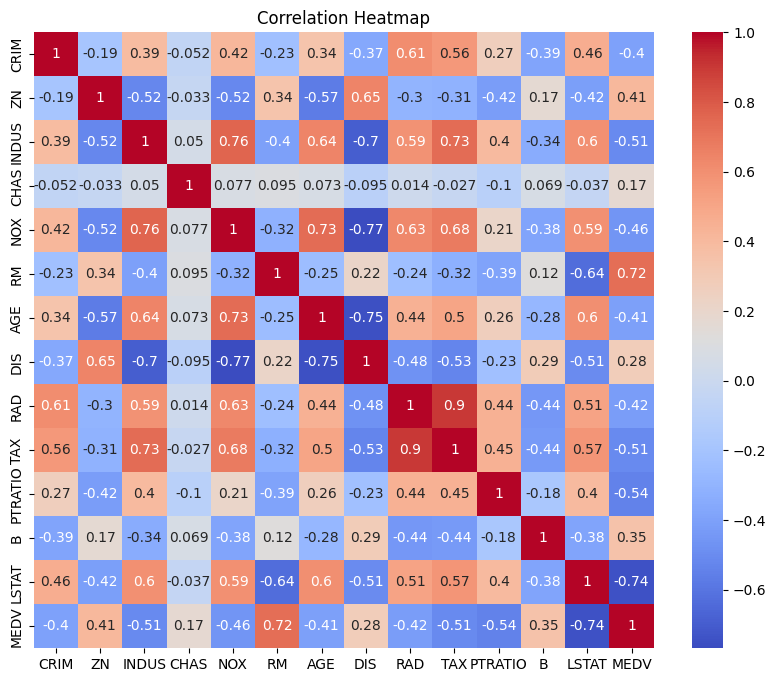

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
correlations = df.corr()['MEDV'].abs().sort_values(ascending=False)
top_features = correlations[1:6].index.tolist()
print("Top 5 correlated features with MEDV:", top_features)

Top 5 correlated features with MEDV: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [12]:
X_simple = df[['RM']]
y = df['MEDV']

In [13]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [14]:
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)

In [16]:
# Evaluation
print("Simple Linear Regression:")
print("R²:", r2_score(y_test_s, y_pred_s))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))

Simple Linear Regression:
R²: 0.4786797724382229
MAE: 4.2050483282852475
RMSE: 6.631100783926037


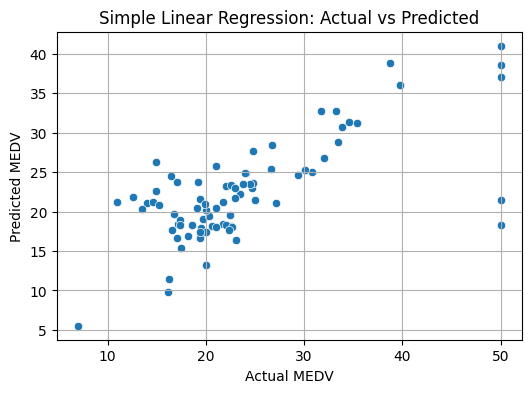

In [17]:
# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_s, y=y_pred_s)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


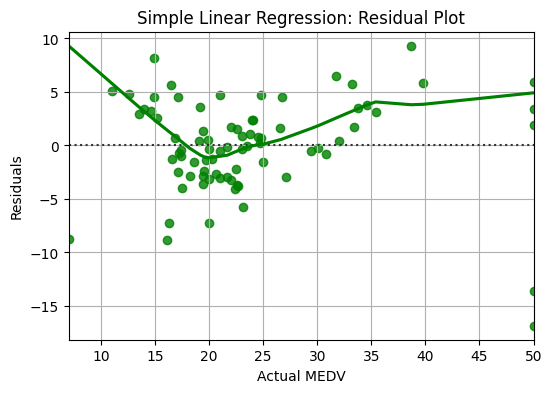

In [18]:
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test_s, y=y_pred_s, lowess=True, color='g')
plt.xlabel("Actual MEDV")
plt.ylabel("Residuals")
plt.title("Simple Linear Regression: Residual Plot")
plt.grid(True)
plt.show()

In [20]:
X_multi = df[top_features]
y = df['MEDV']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

In [21]:
# Evaluation
print("\nMultiple Linear Regression:")
print("R²:", r2_score(y_test_m, y_pred_m))
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))



Multiple Linear Regression:
R²: 0.541006054818421
MAE: 3.7473292035361268
RMSE: 6.222097595549705


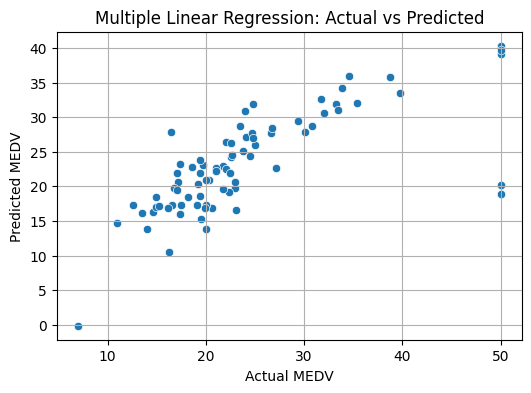

In [22]:
# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_m, y=y_pred_m)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

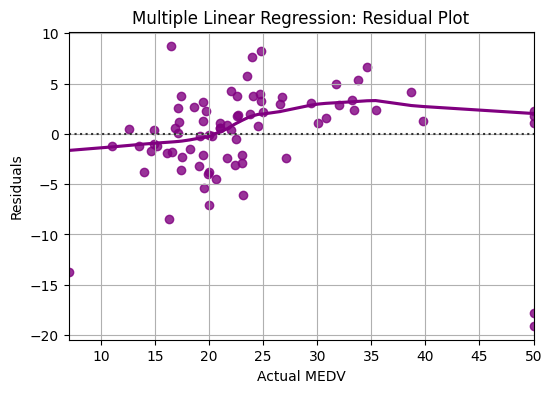

In [23]:
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test_m, y=y_pred_m, lowess=True, color='purple')
plt.xlabel("Actual MEDV")
plt.ylabel("Residuals")
plt.title("Multiple Linear Regression: Residual Plot")
plt.grid(True)
plt.show()